## The Sparks Foundation GRIP December 2022 Data Science & Business Analytics

#GRIPDECEMBER22

Name : Sakshi Lathi

task 5: Exploratory Data Analysis - Sports

Perform 'Exploratory Data Analysis' on data set ' Indian Premier League'
As a Sports Analysts, find out the most successful teams, players and factors contributing win or lose of teams.
Suggest teams or players a company should endorse for its products.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [5]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [6]:
deliveries.shape

(179078, 21)

### Data Cleaning (Deliveries)

In [7]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
deliveries.duplicated().sum()

23

There are 23 duplicate values so we have to drop them.

In [9]:
deliveries=deliveries.drop_duplicates()
deliveries.shape

(179055, 21)

In [11]:
#Dropping certain columns as they dont have major data and are null values
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

In [12]:
deliveries['batting_team'] = deliveries['batting_team'].replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'])

In [13]:
matches = pd.read_csv("matches.csv")
matches.shape

(756, 18)

In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [15]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Data Cleaning (Matches)

In [16]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [17]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [18]:
matches.city = matches.city.fillna('Dubai')
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [19]:
#Checking for duplicate values
matches.duplicated().sum()

0

In [20]:
matches.shape

(756, 18)

In [22]:
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [23]:
matches.shape

(756, 18)

In [24]:
Final_dataset=  pd.merge(matches,deliveries , left_on='id', right_on ='match_id')
Final_dataset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179050,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179051,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179052,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179053,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [25]:
Final_dataset.shape

(179055, 39)

### Data Cleaning (Final Dataset)

In [26]:
Final_dataset.shape

(179055, 39)

In [27]:
Final_dataset.duplicated().sum()

0

In [28]:
#Unique Values of each Column -
for col in Final_dataset[:]:
    print(col,":",Final_dataset[col].unique())
    print("-"*100)

id : [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   1

player_dismissed : [nan 'DA Warner' 'S Dhawan' 'MC Henriques' 'Yuvraj Singh' 'Mandeep Singh'
 'CH Gayle' 'KM Jadhav' 'TM Head' 'Sachin Baby' 'STR Binny' 'SR Watson'
 'S Aravind' 'TS Mills' 'YS Chahal' 'PA Patel' 'RG Sharma' 'JC Buttler'
 'AT Rayudu' 'KH Pandya' 'N Rana' 'KA Pollard' 'TG Southee' 'MA Agarwal'
 'AM Rahane' 'BA Stokes' 'JJ Roy' 'BB McCullum' 'AJ Finch' 'KD Karthik'
 'SPD Smith' 'MS Dhoni' 'DT Christian' 'M Vohra' 'WP Saha' 'HM Amla'
 'AR Patel' 'Vishnu Vinod' 'P Negi' 'AP Tare' 'KK Nair' 'SW Billings'
 'SV Samson' 'CH Morris' 'CR Brathwaite' 'PJ Cummins' 'RR Pant' 'S Nadeem'
 'SK Raina' 'DR Smith' 'DS Kulkarni' 'G Gambhir' 'RV Uthappa' 'CA Lynn'
 'YK Pathan' 'SA Yadav' 'CR Woakes' 'SP Narine' 'RA Tripathi'
 'F du Plessis' 'R Bhatia' 'DL Chahar' 'A Zampa' 'AB Dinda' 'DJ Hooda'
 'BCJ Cutting' 'V Shankar' 'NV Ojha' 'Rashid Khan' 'MP Stoinis'
 'GJ Maxwell' 'DA Miller' 'MM Sharma' 'VR Aaron' 'V Kohli'
 'AB de Villiers' 'MJ McClenaghan' 'Ankit Sharma' 'MK Tiwary' 'SN Thakur'
 '

In [29]:
Final_dataset.iloc[Final_dataset['win_by_runs'].idxmax()]

id                                44
season                          2017
city                           Delhi
date                      2017-05-06
team1                 Mumbai Indians
team2               Delhi Daredevils
toss_winner         Delhi Daredevils
toss_decision                  field
result                        normal
dl_applied                         0
winner                Mumbai Indians
win_by_runs                      146
win_by_wickets                     0
player_of_match          LMP Simmons
venue               Feroz Shah Kotla
umpire1                  Nitin Menon
umpire2                    CK Nandan
umpire3                          NaN
match_id                          44
inning                             1
batting_team          Mumbai Indians
bowling_team        Delhi Daredevils
over                               1
ball                               1
batsman                  LMP Simmons
non_striker                 PA Patel
bowler                        Z Khan
i

In [30]:
Final_dataset.iloc[Final_dataset['win_by_wickets'].idxmax()]

id                                                       3
season                                                2017
city                                                Rajkot
date                                            2017-04-07
team1                                        Gujarat Lions
team2                                Kolkata Knight Riders
toss_winner                          Kolkata Knight Riders
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                               Kolkata Knight Riders
win_by_runs                                              0
win_by_wickets                                          10
player_of_match                                    CA Lynn
venue               Saurashtra Cricket Association Stadium
umpire1                                        Nitin Menon
umpire2                                          CK Nand

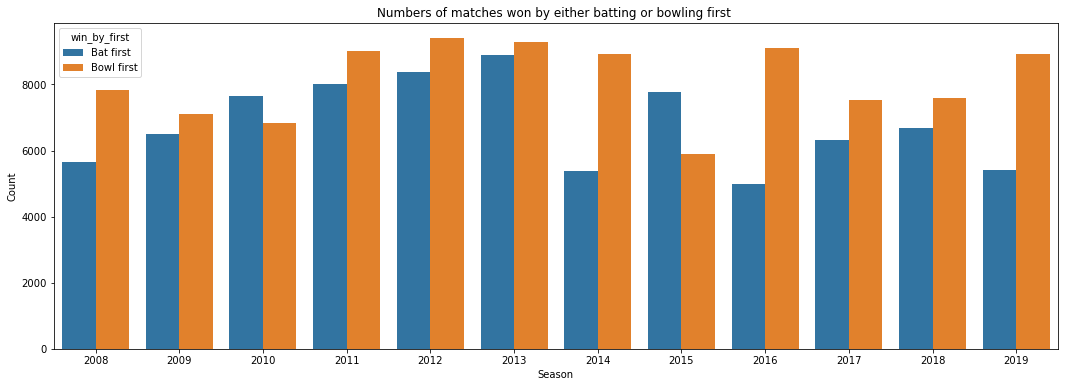

In [36]:
Final_dataset['win_by_first'] = np.where(Final_dataset['win_by_runs']>0,'Bat first','Bowl first')

plt.figure(figsize = (18,6))
sns.countplot(x = Final_dataset['season'], hue = Final_dataset['win_by_first'])
plt.title("Numbers of matches won by either batting or bowling first ")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

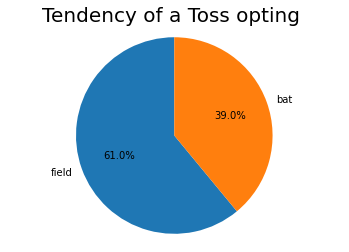

In [35]:
Toss = Final_dataset.toss_decision.value_counts()

plt.pie(Toss.values, labels = Toss.index, autopct = '%.1f%%', startangle = 90)
plt.title('Tendency of a Toss opting')
plt.axis('equal')
plt.show()

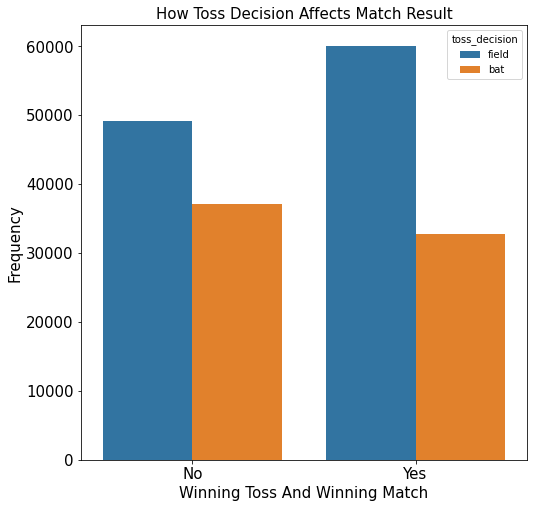

In [37]:
Final_dataset['toss_win_game_win'] = np.where((Final_dataset.toss_winner == Final_dataset.winner),'Yes','No')
plt.figure(figsize = (8,8))
sns.countplot(x=Final_dataset['toss_win_game_win'], hue = Final_dataset['toss_decision'])
plt.title("How Toss Decision Affects Match Result", fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss And Winning Match", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

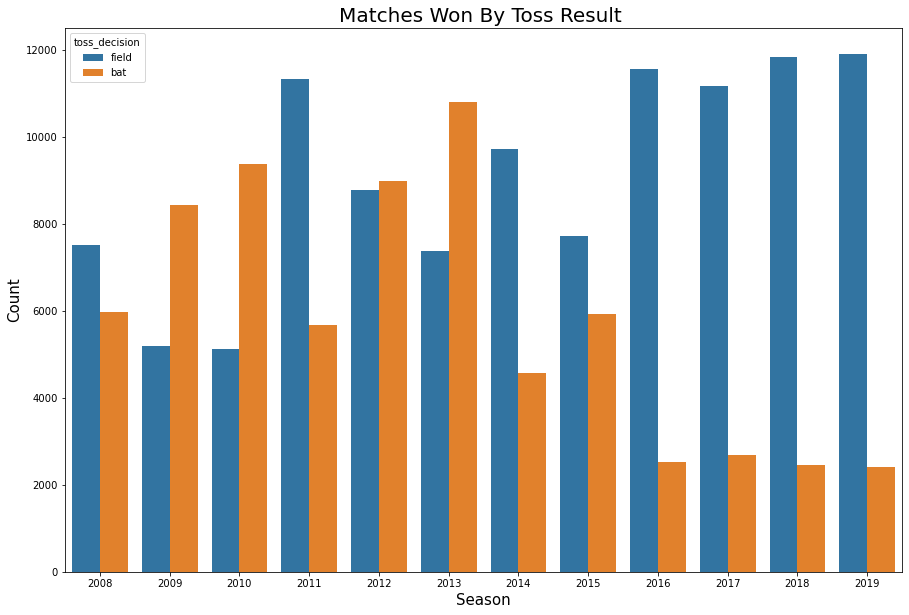

In [38]:
plt.figure(figsize = (15,10))
sns.countplot(x=Final_dataset['season'],hue=Final_dataset['toss_decision'])
plt.title("Matches Won By Toss Result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [39]:
Winner = Final_dataset.drop_duplicates(subset = ['season'], keep = 'last')

Winner[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [41]:
#Who won maximum matches in which ground?
df=Final_dataset.groupby(['winner', 'venue'])['venue'].count().reset_index(name='Matches played and won')
df['venue'] = df['venue'].replace(['Feroz Shah Kotla Ground', 'M Chinnaswamy Stadium', 'MA Chidambaram Stadium, Chepauk','Punjab Cricket Association IS Bindra Stadium, Mohali','Rajiv Gandhi International Stadium, Uppal	'], ['Feroz Shah Kotla', 'M. Chinnaswamy Stadium','M. A. Chidambaram Stadium','Punjab Cricket Association Stadium, Mohali','Rajiv Gandhi Intl. Cricket Stadium'])

In [42]:
df

,winner,venue,Matches played and won
0,Chennai Super Kings,ACA-VDCA Stadium,239
1,Chennai Super Kings,Brabourne Stadium,238
2,Chennai Super Kings,Buffalo Park,215
3,Chennai Super Kings,De Beers Diamond Oval,238
4,Chennai Super Kings,Dr DY Patil Sports Academy,737
...,...,...,...
241,Sunrisers Hyderabad,Saurashtra Cricket Association Stadium,217
242,Sunrisers Hyderabad,Sawai Mansingh Stadium,240
243,Sunrisers Hyderabad,Shaheed Veer Narayan Singh International Stadium,244
244,Sunrisers Hyderabad,Subrata Roy Sahara Stadium,239


In [43]:
df.groupby(['venue'])['Matches played and won'].sum().sort_values(ascending=False)

venue
M. Chinnaswamy Stadium                                 18092
Eden Gardens                                           17989
Wankhede Stadium                                       17589
Feroz Shah Kotla                                       17241
M. A. Chidambaram Stadium                              13890
Rajiv Gandhi International Stadium, Uppal              13303
Punjab Cricket Association Stadium, Mohali             11581
Sawai Mansingh Stadium                                 11150
Maharashtra Cricket Association Stadium                 5055
Subrata Roy Sahara Stadium                              4064
Dr DY Patil Sports Academy                              3993
Kingsmead                                               3643
Sardar Patel Stadium, Motera                            2893
SuperSport Park                                         2866
Brabourne Stadium                                       2718
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     2546
Saurashtra Cricket

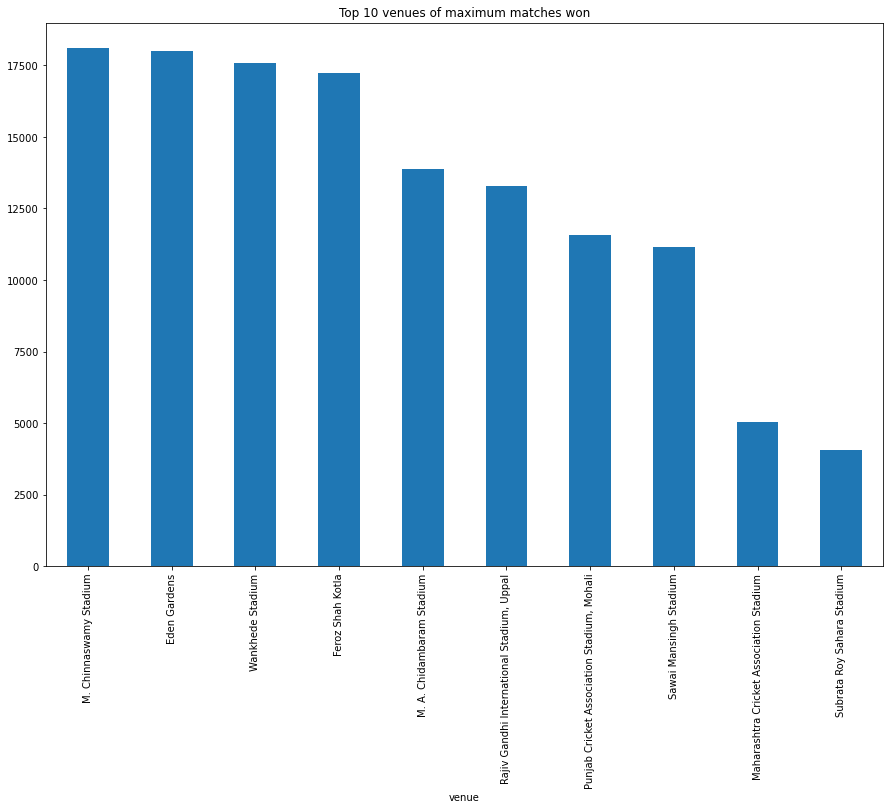

In [44]:
plt.figure(figsize = (15,10))
df.groupby(['venue'])['Matches played and won'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Top 10 venues of maximum matches won")
plt.show()

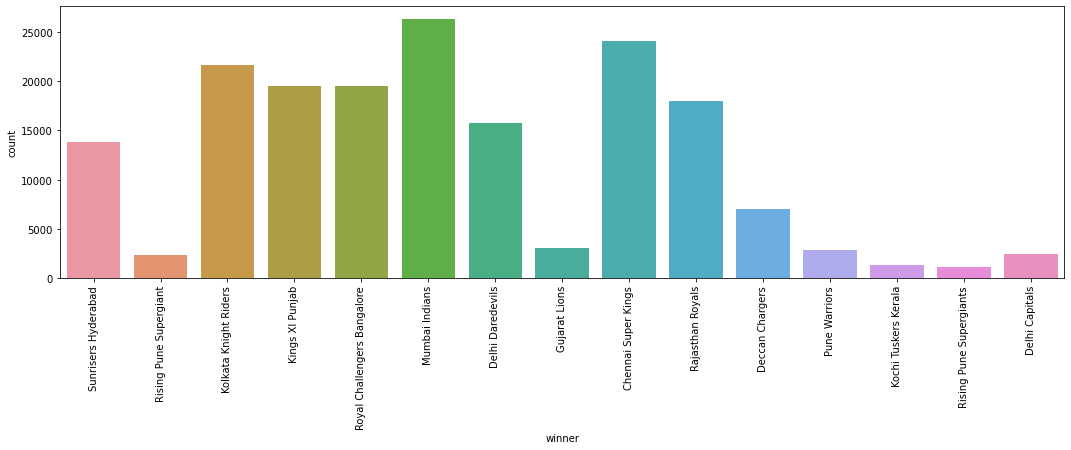

In [45]:
#Who won maximum times in the IPL seasons?
plt.figure(figsize=[18,5])
sns.countplot(x=Final_dataset['winner'])
plt.xticks(rotation=90)
plt.show()

In [46]:
Number_of_fours = Final_dataset[Final_dataset['batsman_runs'] == 4]
Number_of_fours.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')]).sort_values(by=['fours'],ascending=False)

,runs by fours,fours
batting_team,,
Mumbai Indians,10352,2588
Kings XI Punjab,9832,2458
Kolkata Knight Riders,9736,2434
Royal Challengers Bangalore,9440,2360
Chennai Super Kings,8772,2193
Delhi Daredevils,8632,2158
Rajasthan Royals,8136,2034
Sunrisers Hyderabad,5772,1443
Deccan Chargers,3828,957


In [47]:
Number_of_six = Final_dataset[Final_dataset['batsman_runs'] == 6]
Number_of_six.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')]).sort_values(by=['sixes'],ascending=False)

,runs by six,sixes
batting_team,,
Royal Challengers Bangalore,6792,1132
Mumbai Indians,6576,1096
Kings XI Punjab,5856,976
Chennai Super Kings,5838,973
Kolkata Knight Riders,5580,930
Delhi Daredevils,4806,801
Rajasthan Royals,4086,681
Sunrisers Hyderabad,3198,533
Deccan Chargers,2400,400


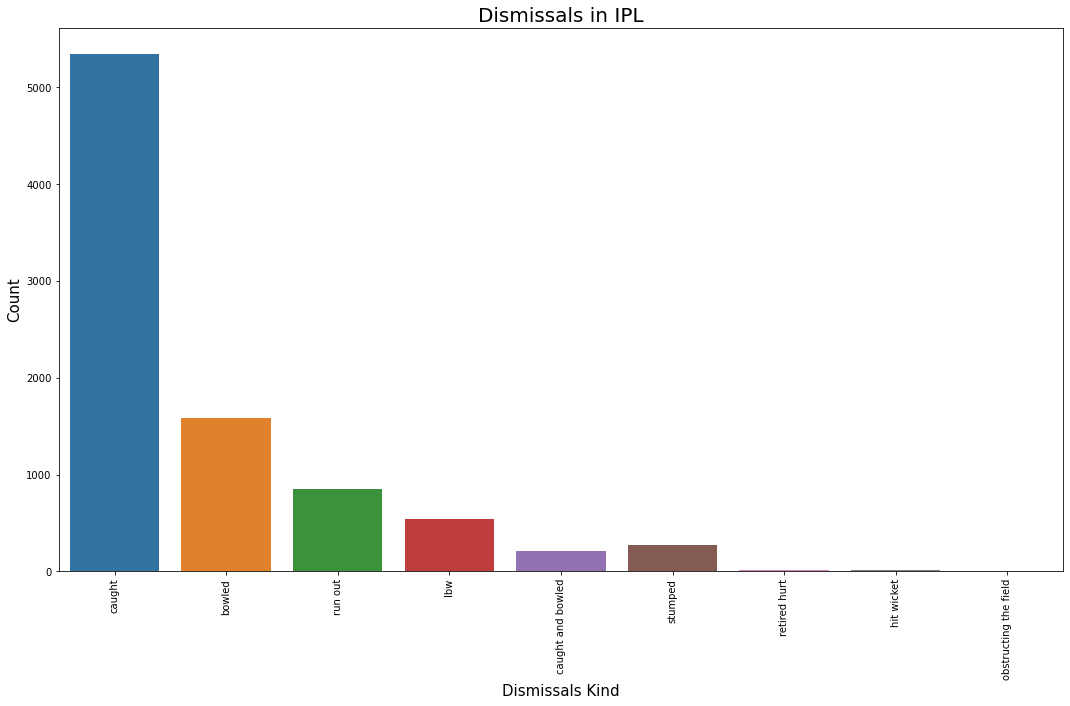

In [48]:
#Checking for Bowling
plt.figure(figsize=(18,10))
ax=sns.countplot(x=Final_dataset['dismissal_kind'])
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals Kind",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

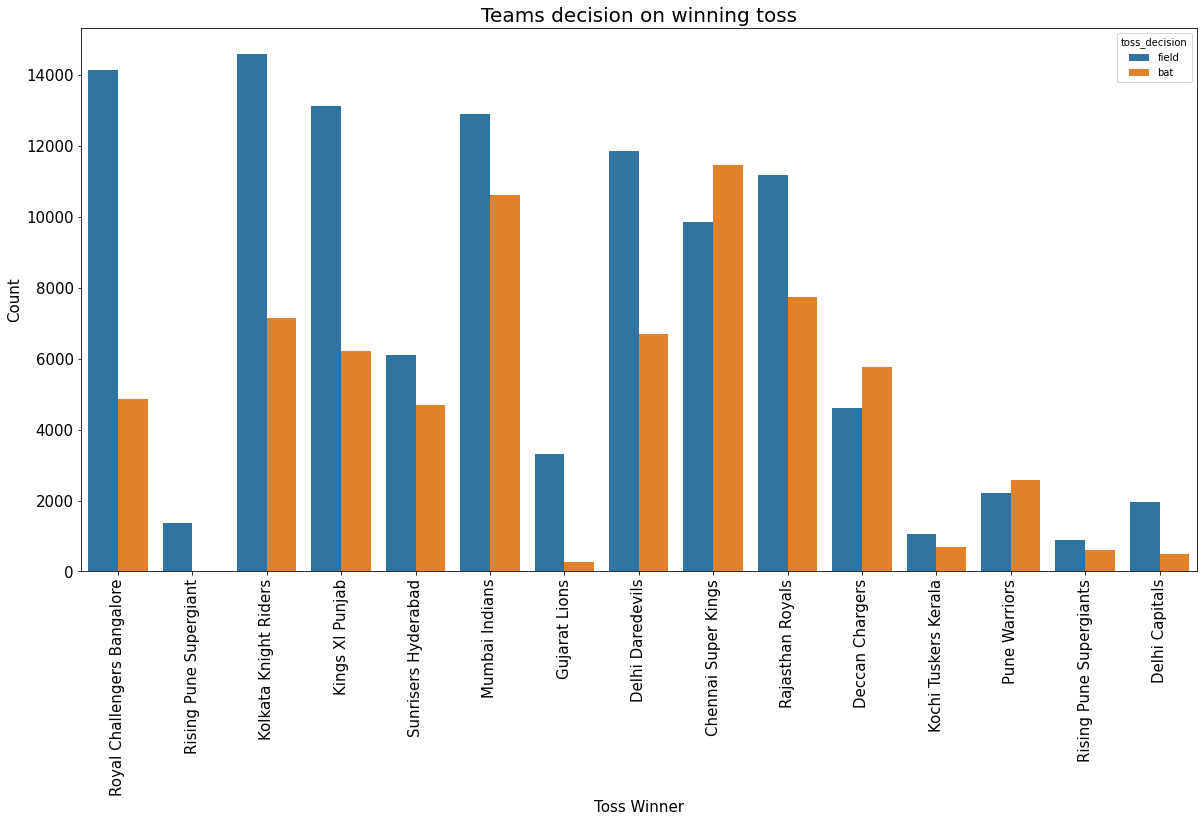

In [53]:
plt.figure(figsize = (20,10))
sns.countplot(x=Final_dataset['toss_winner'], hue = Final_dataset['toss_decision'])
plt.title("Teams decision on winning toss", size = 20)
plt.xticks(size = 15, rotation=90)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

In [54]:
bowler_DATA = Final_dataset.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_DATA.columns = ['Runs given','Balls played','Wickets taken']
TopBowler_wickets = bowler_DATA.sort_values(['Wickets taken'], ascending=False)[:20]
TopBowler_wickets

,Runs given,Balls played,Wickets taken
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2602,3634,136


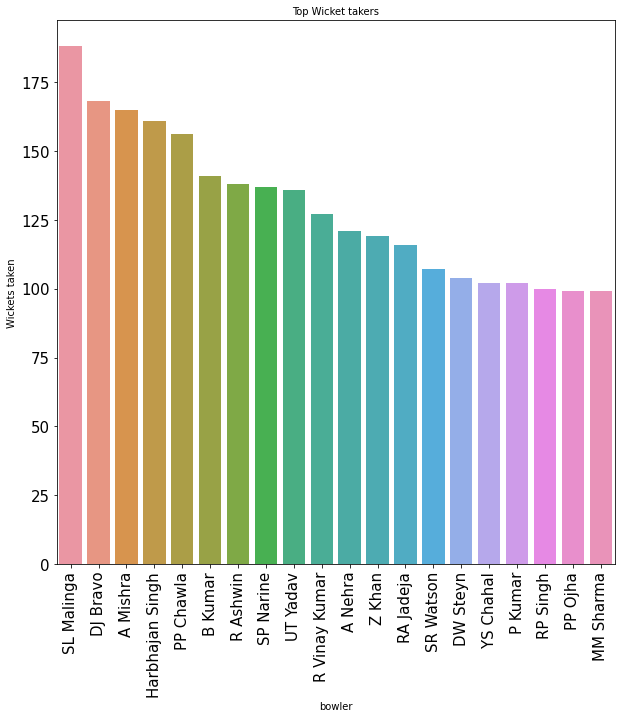

In [56]:
plt.figure(figsize = (10,10))
sns.barplot(x = TopBowler_wickets.index,y = TopBowler_wickets['Wickets taken'])
plt.title("Top Wicket takers", size = 10)
plt.xticks(size = 15, rotation=90)
plt.yticks(size = 15)
plt.show()

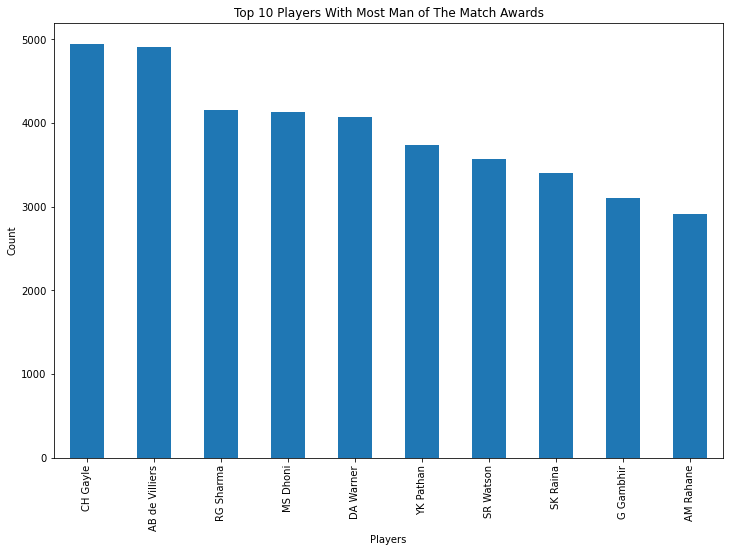

In [58]:
Man_of_The_Match = Final_dataset['player_of_match'].value_counts()
Man_of_The_Match.head(10).plot(kind = 'bar',figsize = (12,8))
plt.title("Top 10 Players With Most Man of The Match Awards")
plt.ylabel("Count")
plt.xlabel("Players") 
plt.show()

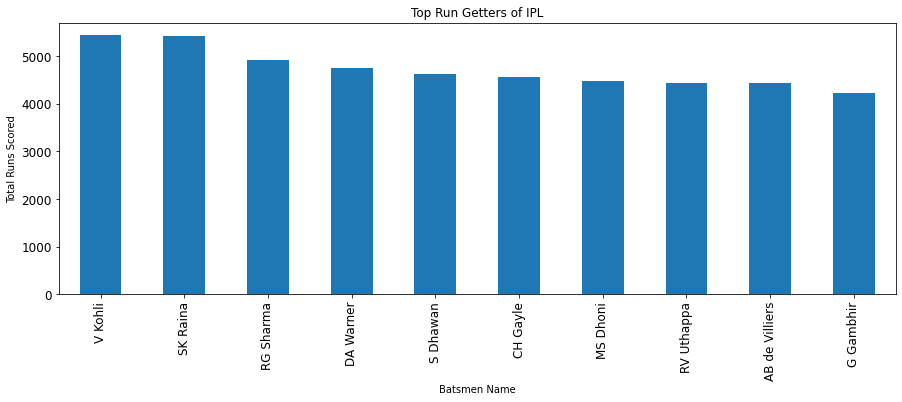

In [59]:
Final_dataset.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL")
plt.xlabel("Batsmen Name")
plt.ylabel("Total Runs Scored")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

So we can conclude that,                                                                                                       
1.Mumbai Indians has won with maximum runs.                                                                                     
2.Kolkata Knight Riders won by maximum wickets.                                                                                 
3.After Winning The Toss, The Maximum Probability is Fielding First (61%).                                                     
4.Mumbai Indians has won majority of the times, followed by Chennai Super Kings and Kolkata Knight Riders respectively.         
5.Maximum fours in the overall IPL seasons was by Mumbai Inidans and sixes in the overall IPL seasons was by Royal Challengers Bangalore.                                                                                                                     
6.Virat Kohli And Suresh Raina Are The Top Players Who Make Top Runs In The IPL.                                               

We can say that :                                                                                                               
most successful teams are Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders, Royal Challengers Bangalore, Punjab.     
Players and factors contributing win or lose of these teams are -                                                               
Battesman : V kohli, Suresh Raina, Rohit Sharma, David Warner, SHikhar Dhawan, Chris Gayle, MS dhoni, Uthappa, AB de Villiers, Gambhir, Watson and Rahane.
and                                                                                                                             
Bowlers : SL Malinga, DJ Bravo,A Mishra,Harbhajan Singh,PP Chawla,B Kumar,R Ashwin, SP Narine, UT Yadav, R Vinay Kumar,A Nehra, Z Khan,RA Jadeja, SR Watson andDW Steyn.